In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from google.colab import drive

# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Iris Dataset

Loading and reading data from the iris dataset into a dataframe. 

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [3]:
X = iris.data 
target = iris.target 
names = iris.target_names

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = list(iris.target_names))

In [5]:
# viewing the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Summary Statistics

In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [7]:
df_stats = df.describe(include='all')
df_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df_stats.loc['range'] = df_stats.loc['max'] - df_stats.loc['min']
df_stats.loc['var'] = df.var()
df_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## 1.2 Data Visualization

**Histograms**

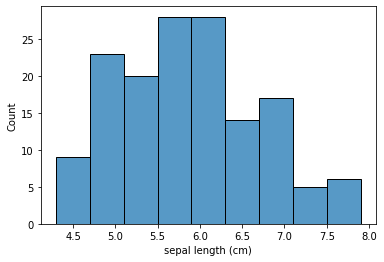

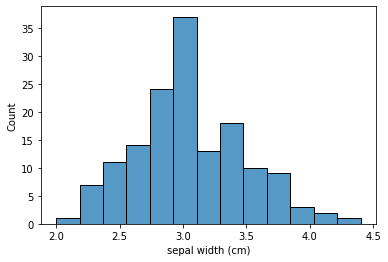

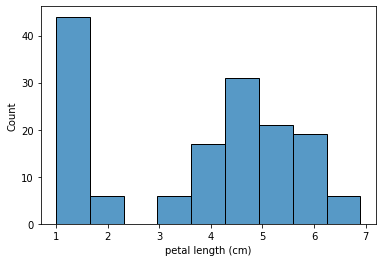

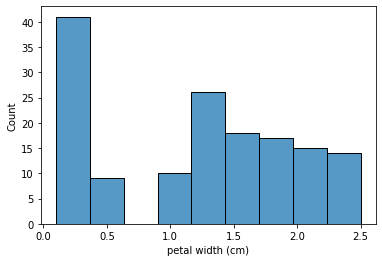

In [9]:
sns.histplot(data=df, x="sepal length (cm)")
plt.show()

sns.histplot(data=df, x="sepal width (cm)")
plt.show()

sns.histplot(data=df, x="petal length (cm)")
plt.show()

sns.histplot(data=df, x="petal width (cm)")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8acb9b5c50>,
      dtype=object)

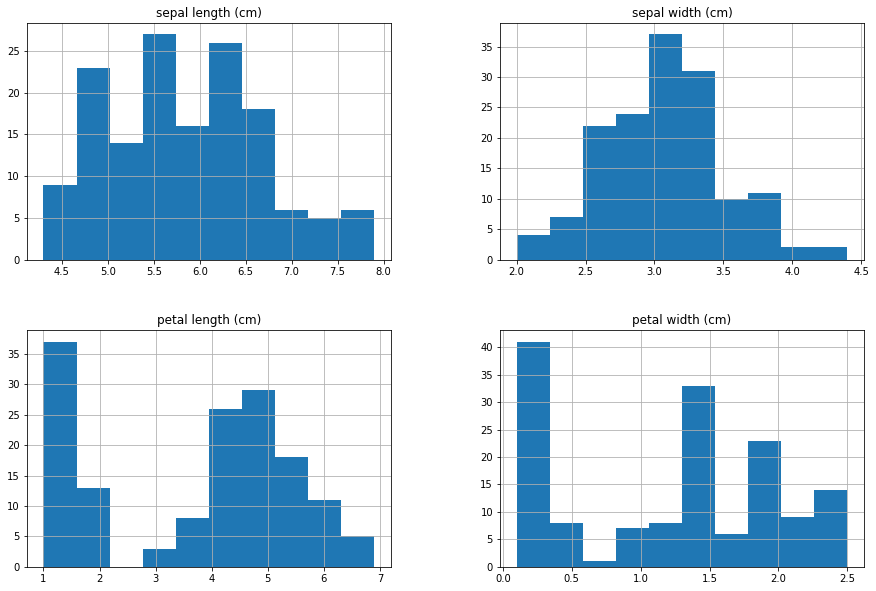

In [10]:
df.hist(figsize=(15, 10))

**Box Plots**

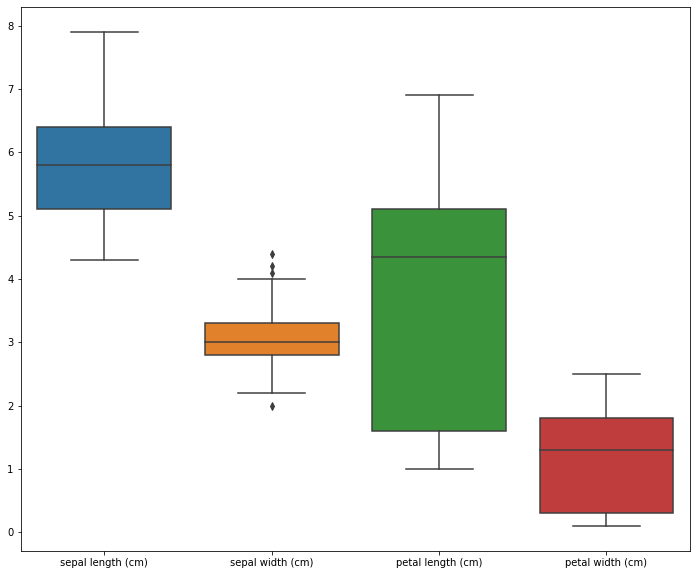

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df)

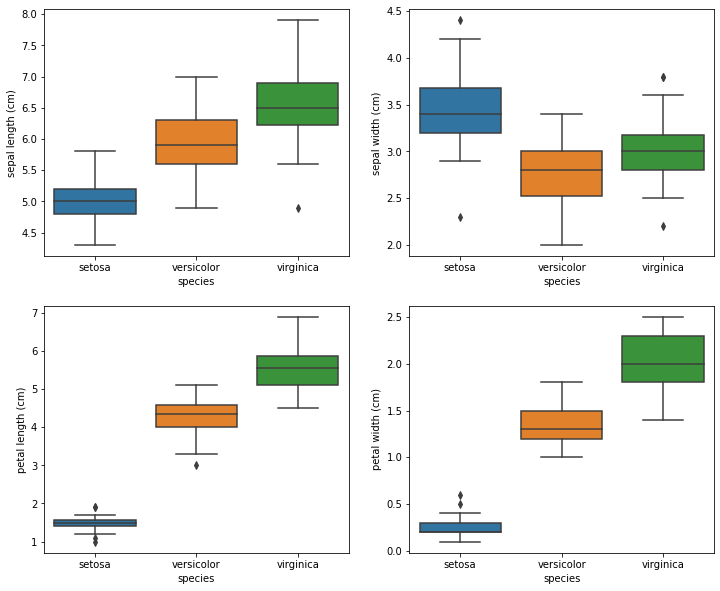

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal length (cm)',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal width (cm)',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal length (cm)',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal width (cm)',data=df)
plt.show()

**Pairwise Plot**

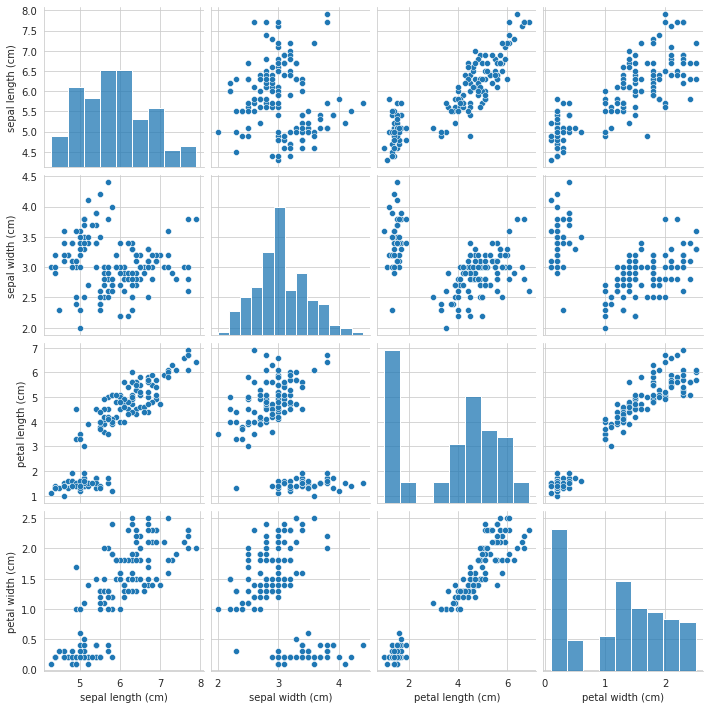

In [13]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

You will see nC2 plots above the diagonal/below the diagonal
i.e 4C2 = 6 plots above/below the diagonal.



**Class-wise Visualization**

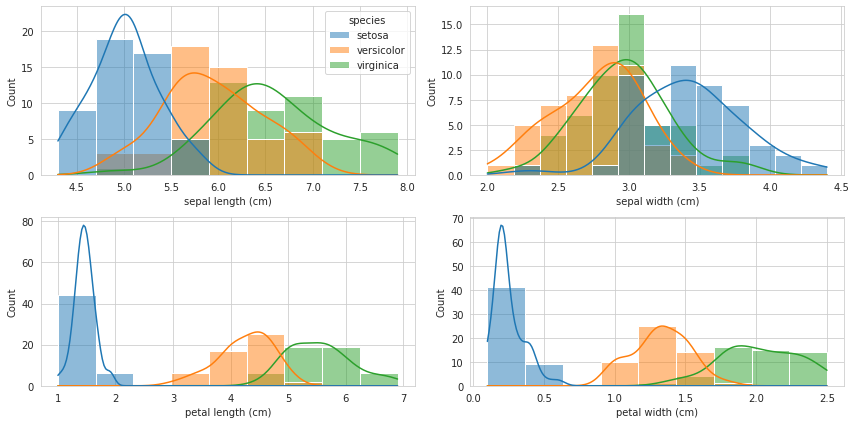

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
for col, ax in zip(df.columns[:4], axs.flat):
    sns.histplot(data=df, x=col, kde=True, hue='species', common_norm=False, legend=ax==axs[0,0], ax=ax)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

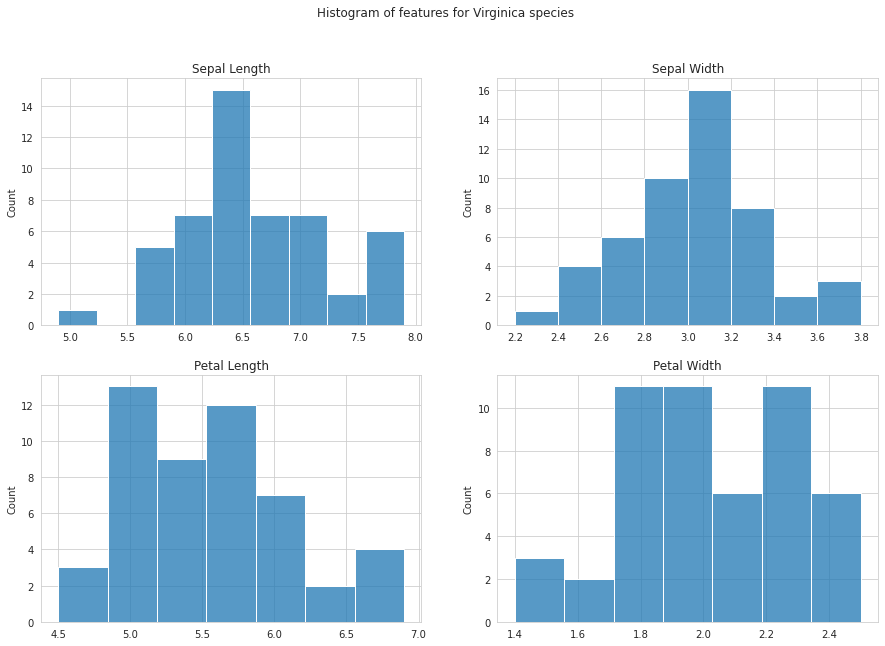

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df[df['species'] == 'virginica']['sepal length (cm)'], ax = axs[0,0])
axs[0,0].set_title('Sepal Length')
axs[0,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'virginica']['sepal width (cm)'], ax = axs[0,1])
axs[0,1].set_title('Sepal Width')
axs[0,1].set(xlabel = None)

sns.histplot(df[df['species'] == 'virginica']['petal length (cm)'], ax = axs[1,0])
axs[1,0].set_title('Petal Length')
axs[1,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'virginica']['petal width (cm)'], ax = axs[1,1])
axs[1,1].set_title('Petal Width')
axs[1,1].set(xlabel = None)

plt.suptitle('Histogram of features for Virginica species')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

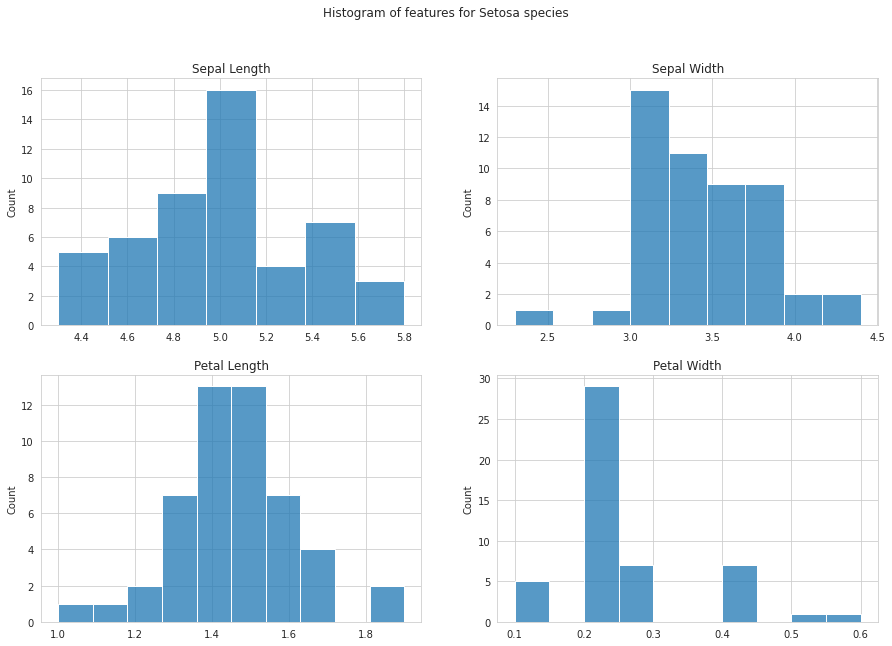

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df[df['species'] == 'setosa']['sepal length (cm)'], ax = axs[0,0])
axs[0,0].set_title('Sepal Length')
axs[0,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'setosa']['sepal width (cm)'], ax = axs[0,1])
axs[0,1].set_title('Sepal Width')
axs[0,1].set(xlabel = None)

sns.histplot(df[df['species'] == 'setosa']['petal length (cm)'], ax = axs[1,0])
axs[1,0].set_title('Petal Length')
axs[1,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'setosa']['petal width (cm)'], ax = axs[1,1])
axs[1,1].set_title('Petal Width')
axs[1,1].set(xlabel = None)

plt.suptitle('Histogram of features for Setosa species')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

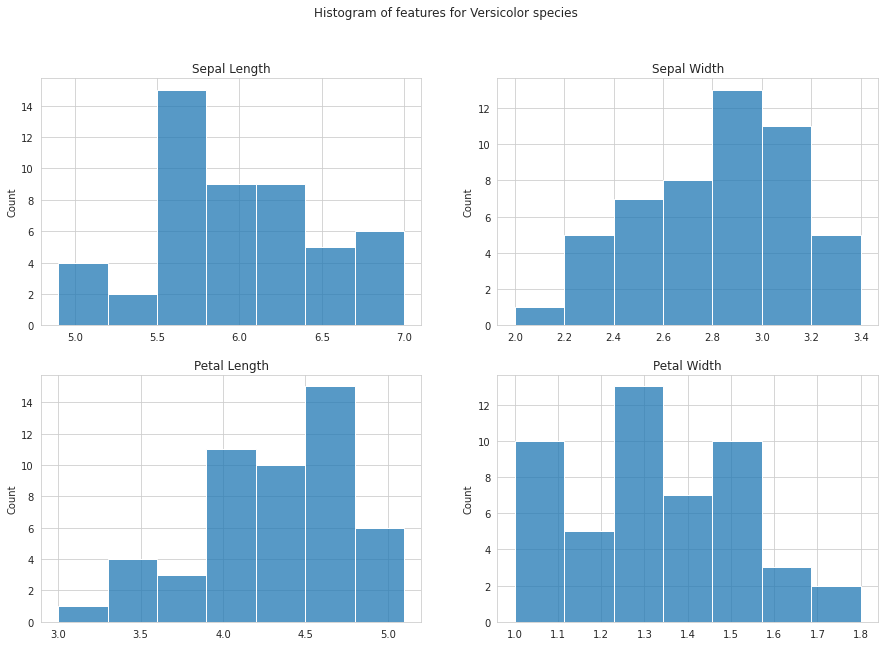

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df[df['species'] == 'versicolor']['sepal length (cm)'], ax = axs[0,0])
axs[0,0].set_title('Sepal Length')
axs[0,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'versicolor']['sepal width (cm)'], ax = axs[0,1])
axs[0,1].set_title('Sepal Width')
axs[0,1].set(xlabel = None)

sns.histplot(df[df['species'] == 'versicolor']['petal length (cm)'], ax = axs[1,0])
axs[1,0].set_title('Petal Length')
axs[1,0].set(xlabel = None)

sns.histplot(df[df['species'] == 'versicolor']['petal width (cm)'], ax = axs[1,1])
axs[1,1].set_title('Petal Width')
axs[1,1].set(xlabel = None)

plt.suptitle('Histogram of features for Versicolor species')
plt.show

## 1.3 Conceptual Questions

**1. How many features are there? What are the types of the features (e.g., numeric, nominal, discrete, continuous)?**

The iris dataset seems to consist of information on 150 Iris flowers. 
There are three Iris species: Setosa, Versicolor and Virginica having 50 values each from the dataset. Each flower is characterized by four features: 
1. sepal length in centimeters
2. sepal width in centimeters
3. petal length in centimeters
4. petal width in centimeters

The target being species (Setosa, Versicolour, Virginica).

Four columns (Sepal Length, Sepal Width, Petal Length and Petal Width) belong to the numerical type while one single column (species) is of categorical type.  

**2. From the histograms of the whole data, how do the shapes of the histograms for petal
length and petal width differ from those for sepal length and sepal width? Is there a
particular value of petal length (which ranges from 1.0 to 6.9) where the distribution of
petal lengths (as illustrated by the histogram) could be best segmented into two parts?**

The histograms for petal length and petal width are mostly multimodal/bimodal whereas the histograms for sepal length and sepal width are unimodal. For the histogram displaying petal length characterisitics, somewhere around 2.5, the data shows the characteristics of a normal distribution. Hence, the existence of two curves represents the difference of character between two or more classes of iris data. The iris dataset is already known to have observed data for three species and the histogram for petal length does portray that two of the three species are different in some characters. In unknown datasets, this could be used as an initial assumption that there are two or more different groups of data that could be investigated further. 

**3. Based upon these boxplots, is there a pair of features that appear to have significantly different medians? Recall that the degree of overlap between variabilities is an
important initial indicator of the likelihood that differences in means or medians are
meaningful. Also, based solely upon the box plots, which feature appears to explain
the greatest amount of the data?**

Sepal length and petal width seem to have vastly different medians. Sepal length seems to have a median of about 5.7 while petal width seems to have a median of about 1.4

Petal length seems to explain the greatest amount of data. Considering the range of the petal width which spans from 1 to about 7, we notice that it seems to spread over a comparatively larger range of data.

**4. From the pairwise plots of the features, which features are most correlated from the
plots? Mention at least three pairs.**

Correlation Insights:
1. High co relation between petal length and petal width columns.
2. High correlation between sepal length and petal length. 
3. High correlation between petal width and sepal length. 

Other Insights: 
1. Setosa has both low petal length and width
2. Versicolor has both average petal length and width
3. Virginica has both high petal length and width.
4. Sepal width for setosa is high and length is low.
5. Versicolor have average values for for sepal dimensions.
6. Virginica has small width but large sepal length

**5. Compare the histograms of each class to the histograms of the whole dataset. What
differences do you see in the shapes?**

Sepal length, petal width seem to have different values. 


*   For the Virginica class, the sepal length and the sepal width seem to follow the same pattern as that of the dataset as a whole. There seems to be a slight change for the petal length corresponding to Virginica ranging from about 4.5 to 7 compared to the overall range of 1 to 7, similarly the petal width ranges from about 1.4 to 2.4 for this class when compared to the overall range of 0.1 to 2.4

*   For the Setosa class, the majority of sepal length is between 4.7 and 5.8 whereas for all the classes, the sepal length varies from 4.4 to 7.7 approximately. The sepal width seems to follow the same trend as that of the overall dataset. The one noticeable change is that for petal length concerning setosa, it ranges from 1 - 1.9 whereas petal length for different classes range till 7. Similarly, the petal width for setosa ranges from 0.1 to 0.6 when compared to the overall petal width range (0.1 - 2.5)

*   For the versicolor class, the sepal length seems to match the trend of the overall dataset's sepal length characteristics. However, the petal length for this class seems to range from 3.0 - 5.1 when compared to the overall range of 1 - 7. Similarly, the petal width ranges from 1 - 1.8 when compared to the overall range of 0.1 - 2.5




## Air Quality Dataset

In [18]:
data = pd.read_excel('/content/drive/MyDrive/DataMining/AirQualityUCI/AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## 2.1 Summary Statistics

In [19]:
df_stats = data.describe()
df_stats

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [20]:
df_stats.loc['range'] = df_stats.loc['max'] - df_stats.loc['min']
df_stats.loc['var'] = df.var()
df_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
range,211.900000,2239.750000,1389.000000,263.741476,2414.000000,1679.000000,2882.750000,539.700000,2975.000000,2722.750000,244.600000,288.725000,202.231036
var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Data Visualization

**Histograms**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ac5f95990>,
      dtype=object)

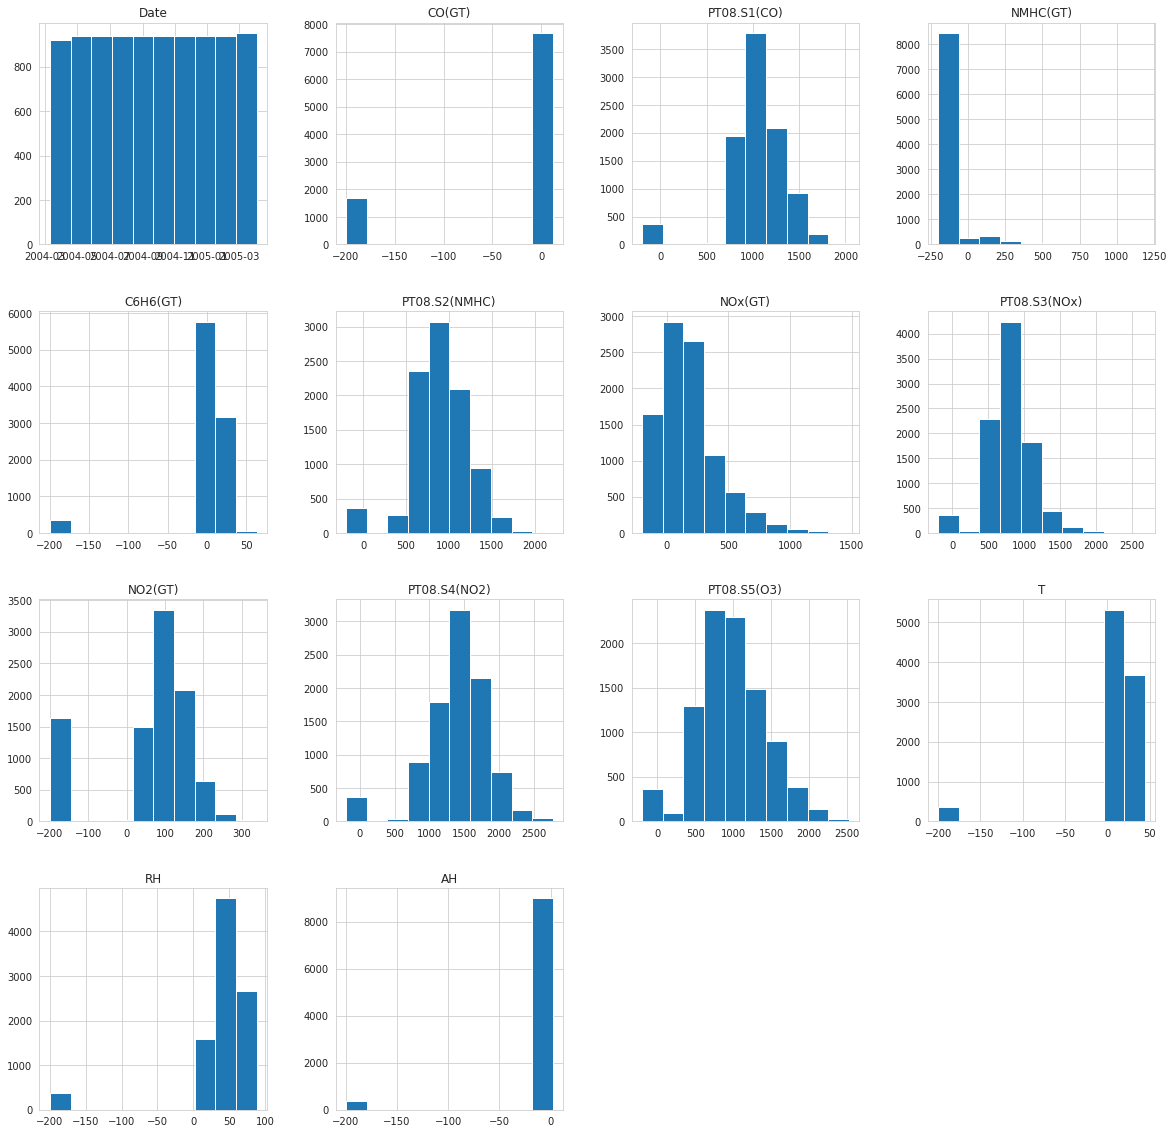

In [21]:
data.hist(figsize=(20, 20))

**Boxplots**

[Text(0.5, 0, '')]

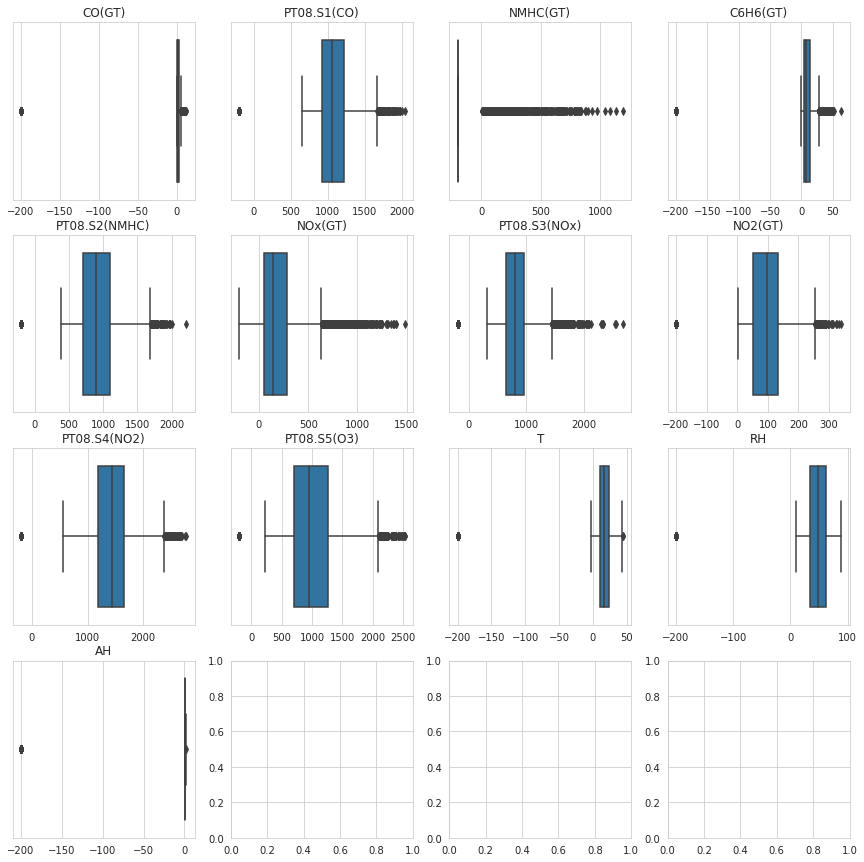

In [22]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

sns.boxplot(x = data['CO(GT)'], ax = axs[0,0])
axs[0,0].set_title('CO(GT)')
axs[0,0].set(xlabel = None)

sns.boxplot(x = data['PT08.S1(CO)'], ax = axs[0,1])
axs[0,1].set_title('PT08.S1(CO)')
axs[0,1].set(xlabel = None)

sns.boxplot(x = data['NMHC(GT)'], ax = axs[0,2])
axs[0,2].set_title('NMHC(GT)')
axs[0,2].set(xlabel = None)

sns.boxplot(x = data['C6H6(GT)'], ax = axs[0,3])
axs[0,3].set_title('C6H6(GT)')
axs[0,3].set(xlabel = None)

sns.boxplot(x = data['PT08.S2(NMHC)'], ax = axs[1,0])
axs[1,0].set_title('PT08.S2(NMHC)')
axs[1,0].set(xlabel = None)

sns.boxplot(x = data['NOx(GT)'], ax = axs[1,1])
axs[1,1].set_title('NOx(GT)')
axs[1,1].set(xlabel = None)

sns.boxplot(x = data['PT08.S3(NOx)'], ax = axs[1,2])
axs[1,2].set_title('PT08.S3(NOx)')
axs[1,2].set(xlabel = None)

sns.boxplot(x = data['NO2(GT)'], ax = axs[1,3])
axs[1,3].set_title('NO2(GT)')
axs[1,3].set(xlabel = None)

sns.boxplot(x = data['PT08.S4(NO2)'], ax = axs[2,0])
axs[2,0].set_title('PT08.S4(NO2)')
axs[2,0].set(xlabel = None)

sns.boxplot(x = data['PT08.S5(O3)'], ax = axs[2,1])
axs[2,1].set_title('PT08.S5(O3)')
axs[2,1].set(xlabel = None)

sns.boxplot(x = data['T'], ax = axs[2,2])
axs[2,2].set_title('T')
axs[2,2].set(xlabel = None)

sns.boxplot(x = data['RH'], ax = axs[2,3])
axs[2,3].set_title('RH')
axs[2,3].set(xlabel = None)

sns.boxplot(x = data['AH'], ax = axs[3,0])
axs[3, 0].set_title('AH')
axs[3,0].set(xlabel = None)


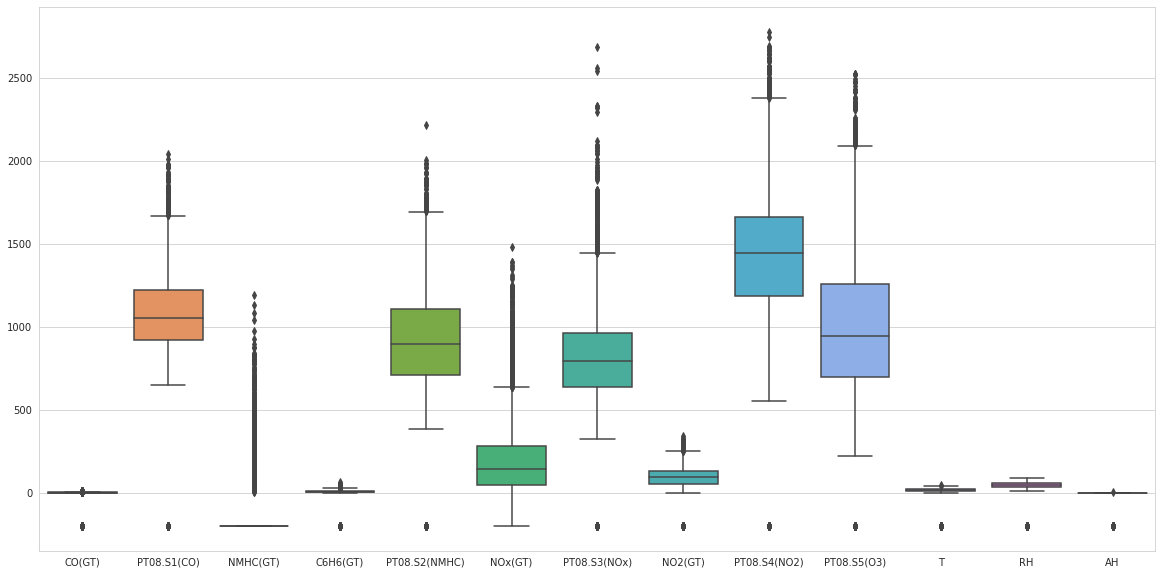

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)

In [24]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

[Text(0.5, 0, '')]

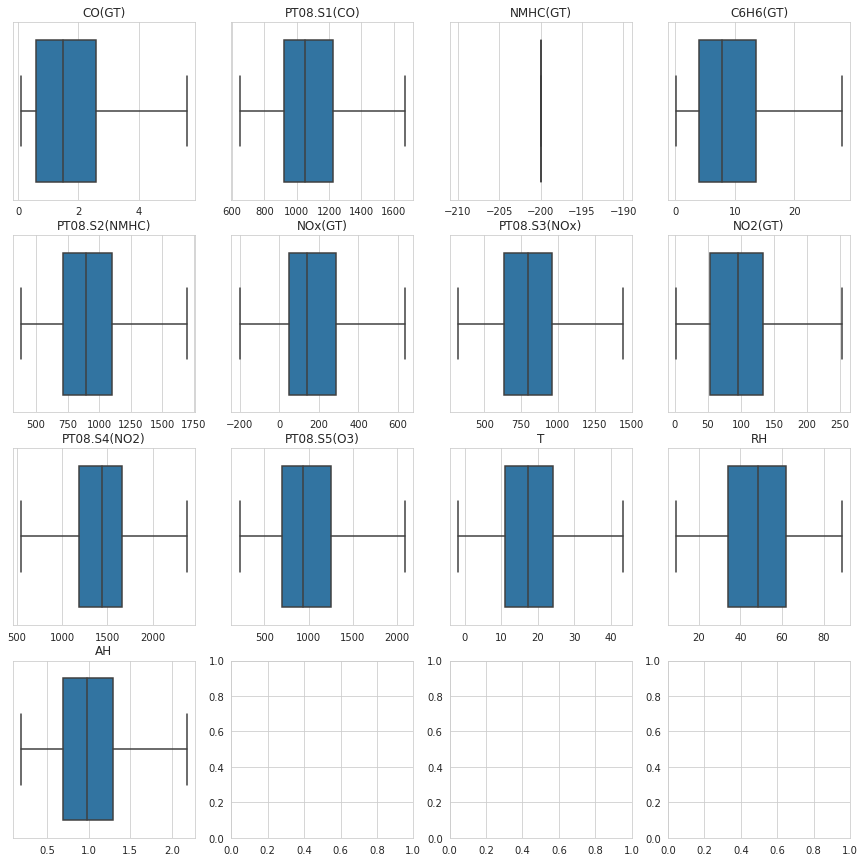

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

sns.boxplot(x = data['CO(GT)'], ax = axs[0,0], showfliers = False)
axs[0,0].set_title('CO(GT)')
axs[0,0].set(xlabel = None)

sns.boxplot(x = data['PT08.S1(CO)'], ax = axs[0,1], showfliers = False)
axs[0,1].set_title('PT08.S1(CO)')
axs[0,1].set(xlabel = None)

sns.boxplot(x = data['NMHC(GT)'], ax = axs[0,2], showfliers = False)
axs[0,2].set_title('NMHC(GT)')
axs[0,2].set(xlabel = None)

sns.boxplot(x = data['C6H6(GT)'], ax = axs[0,3], showfliers = False)
axs[0,3].set_title('C6H6(GT)')
axs[0,3].set(xlabel = None)

sns.boxplot(x = data['PT08.S2(NMHC)'], ax = axs[1,0], showfliers = False)
axs[1,0].set_title('PT08.S2(NMHC)')
axs[1,0].set(xlabel = None)

sns.boxplot(x = data['NOx(GT)'], ax = axs[1,1], showfliers = False)
axs[1,1].set_title('NOx(GT)')
axs[1,1].set(xlabel = None)

sns.boxplot(x = data['PT08.S3(NOx)'], ax = axs[1,2], showfliers = False)
axs[1,2].set_title('PT08.S3(NOx)')
axs[1,2].set(xlabel = None)

sns.boxplot(x = data['NO2(GT)'], ax = axs[1,3], showfliers = False)
axs[1,3].set_title('NO2(GT)')
axs[1,3].set(xlabel = None)

sns.boxplot(x = data['PT08.S4(NO2)'], ax = axs[2,0], showfliers = False)
axs[2,0].set_title('PT08.S4(NO2)')
axs[2,0].set(xlabel = None)

sns.boxplot(x = data['PT08.S5(O3)'], ax = axs[2,1], showfliers = False)
axs[2,1].set_title('PT08.S5(O3)')
axs[2,1].set(xlabel = None)

sns.boxplot(x = data['T'], ax = axs[2,2], showfliers = False)
axs[2,2].set_title('T')
axs[2,2].set(xlabel = None)

sns.boxplot(x = data['RH'], ax = axs[2,3], showfliers = False)
axs[2,3].set_title('RH')
axs[2,3].set(xlabel = None)

sns.boxplot(x = data['AH'], ax = axs[3,0], showfliers = False)
axs[3, 0].set_title('AH')
axs[3,0].set(xlabel = None)


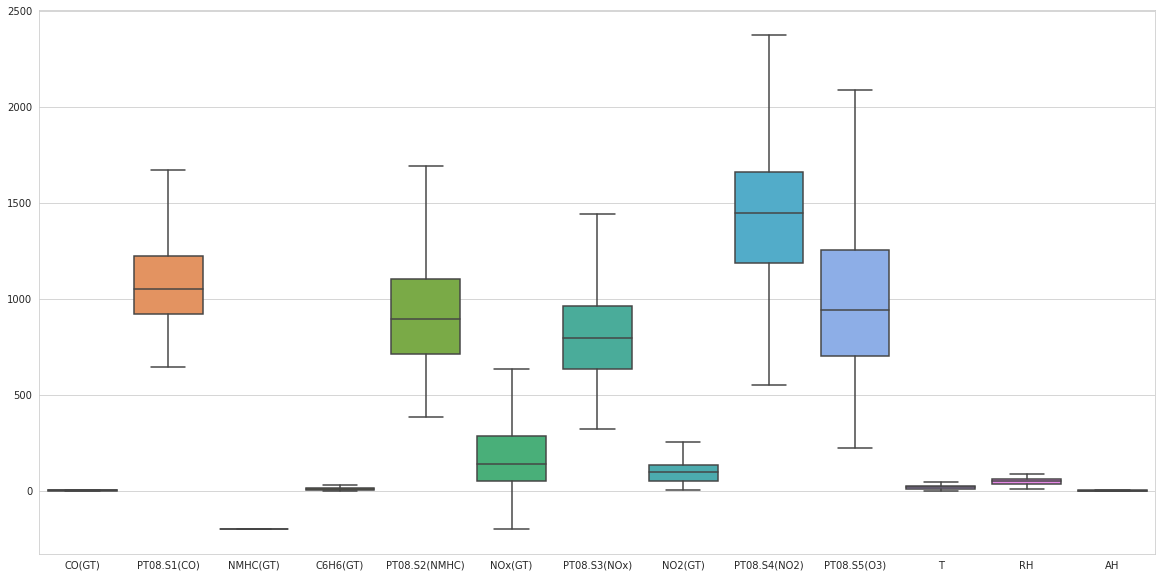

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, showfliers = False)

## 2.3 Conceptual Questions

**1. From the histograms, what abnormality can you see?**

The histogram helps us identify that there exists a lot of null data. Especially in the features like C6H6(GT), T, AH, etc. This also implies that the data is highly imbalanced. Many features seem to be multimodal/bimodal as well. The features that represent unimodal histograms seem to be assymetric.

**2. What abnormality can you see from the summary statistics?**

In the data, we have a lot of -200 values which seems to be a error. The min() row and some statistic measures from data.describe() can corroborate the hypothesis that -200 is an abnormal value. It seems as though the cells having the value -200 are actually missing values that are plausibly replaced with -200 which is also what is mentioned in the description of the dataset. 

**3. How can you remove the abnormality from the data?**

We could filter the rows having the value -200 or we could replace the value -200 with the null value and then plot the corresponding histogram. An extensive approach to this could also be an imputation of the mean or median.

ie. data.replace(to_replace= -200, value= np.NaN, inplace= True)

**4. Show how the histograms look after removing the abnormalities from the data?**

In [27]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [28]:
'''def mean_imputation(col):
    data[col] = data.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))'''

"def mean_imputation(col):\n    data[col] = data.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))"

In [29]:
'''columns = data.columns[2:13]

for i in columns:
    mean_imputation(i)'''

'columns = data.columns[2:13]\n\nfor i in columns:\n    mean_imputation(i)'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ac4fc5b90>,
      dtype=object)

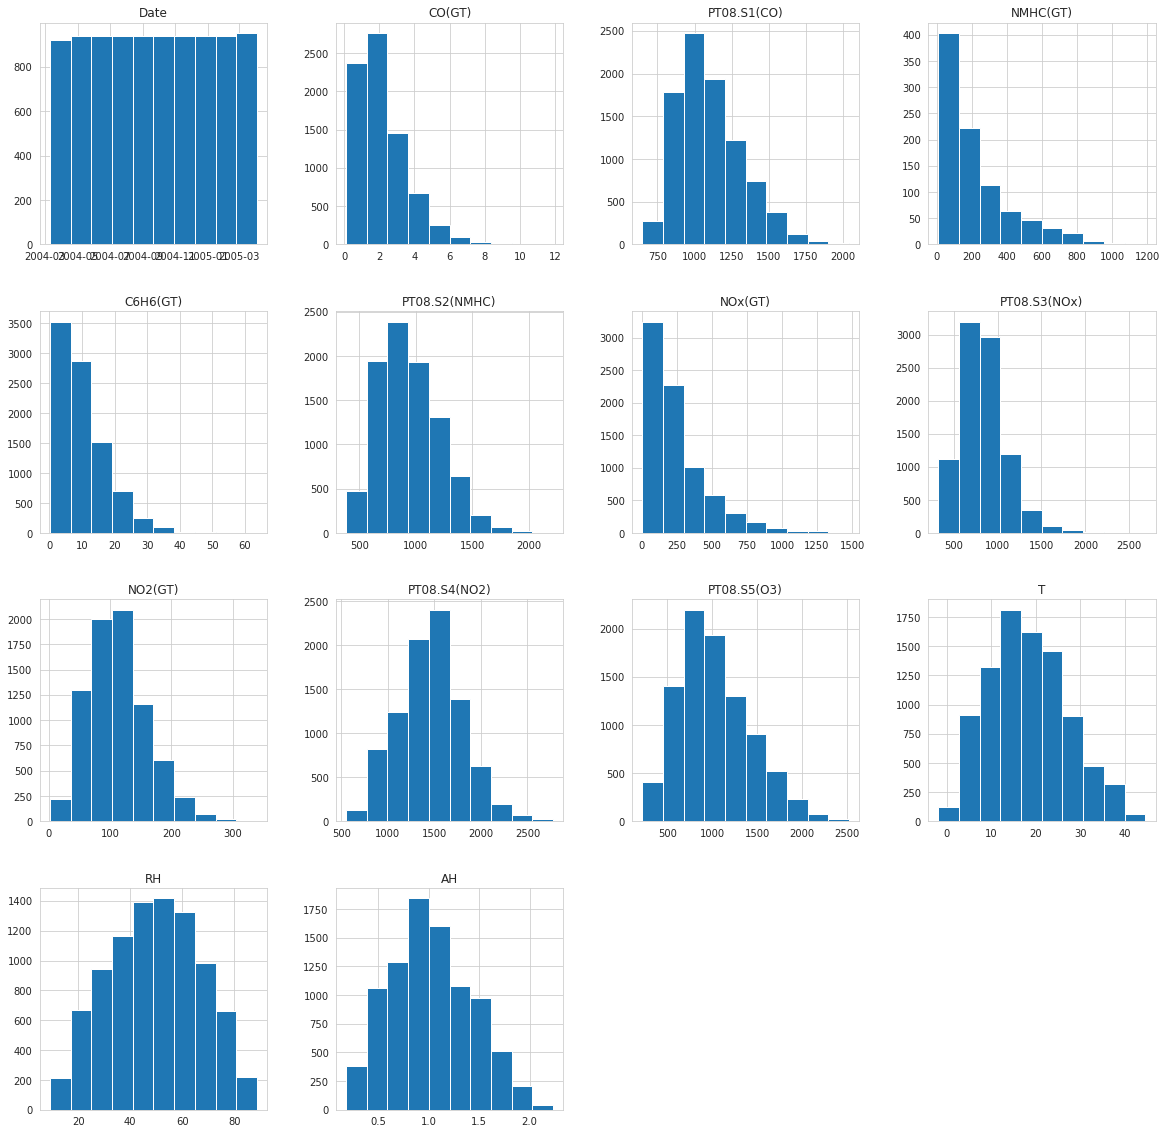

In [30]:
data.hist(figsize=(20, 20))

## Converting to PDF

In [33]:
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [34]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/DataMining/DataMiningAssignmentTwo.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DataMining/DataMiningAssignmentTwo.ipynb to pdf
[NbConvertApp] Support files will be in DataMiningAssignmentTwo_files/
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentTwo_files
[NbConvertApp] Making directory ./DataMiningAssignmentT